# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# Read the csv file

In [2]:
train = pd.read_csv('Train.csv') # the training set
test = pd.read_csv('Test.csv') # the test set
sub = pd.read_csv('sample_submission.csv') # the submission file sample

In [3]:
#check details about the data set
train.info()
print('*' *50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       7928 non-null object
Age                8068 non-null int64
Graduated          7990 non-null object
Profession         7944 non-null object
Work_Experience    7239 non-null float64
Spending_Score     8068 non-null object
Family_Size        7733 non-null float64
Var_1              7992 non-null object
Segmentation       8068 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
ID                 2627 non-null int64
Gender             2627 non-null object
Ever_Married       2577 non-null object
Age                2627 non-null int64
Graduated          2603 non-null object
Profession         2589 non-null 

In [4]:
# Most of the features are categorical
# we have some missing values

In [5]:
# checking if the columns are named in the samw way both in train and test data
train.drop(['Segmentation'], axis=1).columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [6]:
# check th first few rows in the training data
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [112]:
testx = pd.merge(test,train,how='left', on = 'ID')

In [7]:
train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [8]:
# train.corr()['Segmentation'].sort_values().plot(kind='bar', figsize=(7, 6))

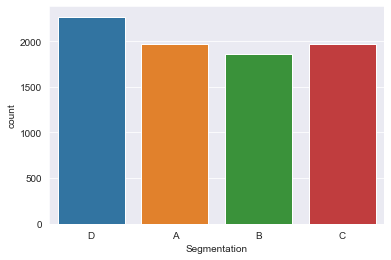

In [9]:
# check target distribution
sns.countplot(train.Segmentation)

## Exploratory Data Analysis (EDA)

In [10]:
# Joining the two data sets for easy preprocessing
Segmentation = train.Segmentation
# train.drop(['Segmentation'], axis=1, inplace=True)
test['Segmentation'] = 'No'
df = train.append(test)

In [11]:
# test

In [12]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


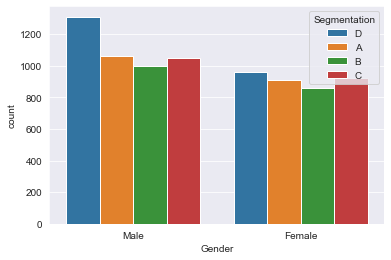

In [13]:
sns.countplot(train.Gender, data=train, hue=Segmentation)

In [14]:
# gender does not really affect segmentation

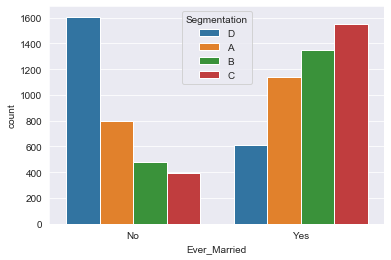

In [15]:
sns.countplot(train.Ever_Married, data=train, hue=Segmentation)

In [16]:
# Majority of the unmarried people are in segment D while most of married individuals belong to segement C
# Isn't this interesting?

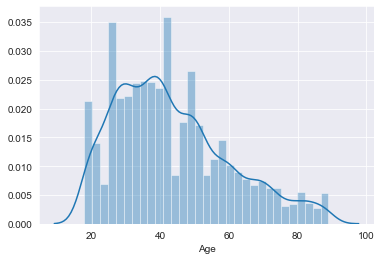

In [17]:
sns.distplot(train.Age)

In [18]:
# Feature binning
from sklearn.preprocessing import KBinsDiscretizer
age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

df['Age_Bins'] =age_discretizer.fit_transform(df['Age'].values.reshape(-1,1)).astype(int)

In [19]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bins
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,8
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,8
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,4


In [20]:
# check for duplicate records
df.duplicated().sum()

0

In [21]:
# Drop duplicates while keeping the first occurence
# df.drop_duplicates(inplace=True)

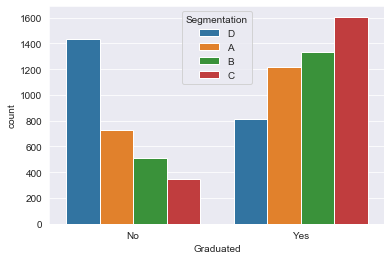

In [22]:
sns.countplot('Graduated', data=train, hue=Segmentation)

In [23]:
# Just like for marital, most graduates are in segement C while most non graduates belong to segement D

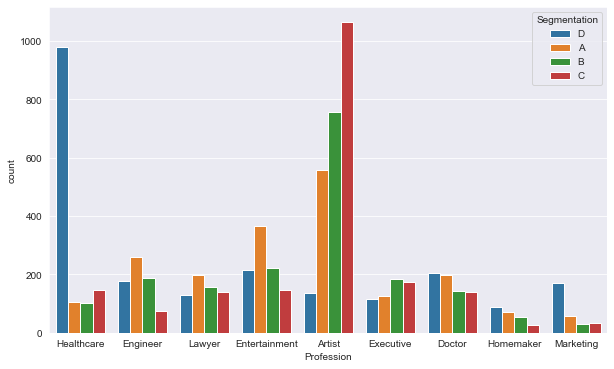

In [24]:
fig = plt.figure(figsize=(10, 6)) 
sns.countplot('Profession', data=train, hue=Segmentation)

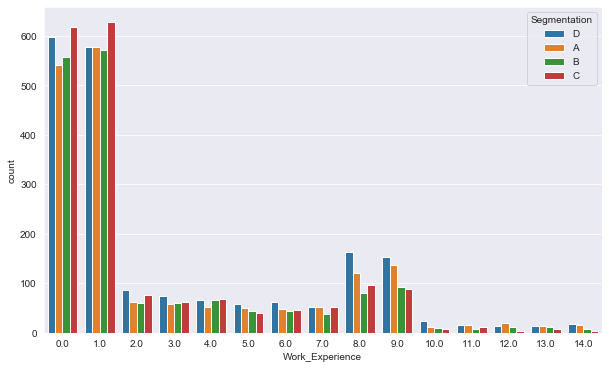

In [25]:
fig = plt.figure(figsize=(10, 6))
sns.countplot('Work_Experience', data=train, hue=Segmentation)

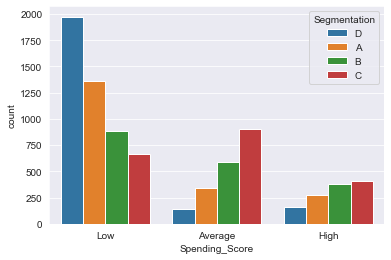

In [26]:
sns.countplot('Spending_Score', data=train, hue=Segmentation)

In [27]:
# Majority of people in the with low spending score are in segment D
# Most people have low spending score

In [28]:
train['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [29]:
train['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [30]:
train['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [31]:
train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

## Data Wrangling/Preprocessing

In [32]:
# Check missing column
train.isnull().sum()/train.shape[0]

ID                 0.000000
Gender             0.000000
Ever_Married       0.017353
Age                0.000000
Graduated          0.009668
Profession         0.015369
Work_Experience    0.102752
Spending_Score     0.000000
Family_Size        0.041522
Var_1              0.009420
Segmentation       0.000000
dtype: float64

In [33]:
# df.fillna(-999, inplace=True)

In [34]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
Age_Bins              0
dtype: int64

In [35]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
Age_Bins             int32
dtype: object

In [36]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_Bins'],
      dtype='object')

In [37]:
df.drop(['ID', 'Age'], axis=1, inplace=True)

In [38]:
train.shape

(8068, 11)

In [39]:
df.dtypes

Gender              object
Ever_Married        object
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
Age_Bins             int32
dtype: object

In [40]:
# Label encoding of the categorical fatures
from sklearn.preprocessing import LabelEncoder

for i in ['Gender' , 'Ever_Married' , 'Graduated','Profession','Spending_Score','Var_1', 'Family_Size', 'Work_Experience' , 'Age_Bins' ]:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype('str'))

In [41]:
# # all blank values replace with mode 
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [42]:
df.dtypes

Gender              int32
Ever_Married        int32
Graduated           int32
Profession          int32
Work_Experience     int32
Spending_Score      int32
Family_Size         int32
Var_1               int32
Segmentation       object
Age_Bins            int32
dtype: object

In [43]:
# Mapping Values to Label ENCODED Values :

df['Segmentation'] = df['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [44]:
df.tail()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bins
2622,1,0,0,5,14,2,3,5,NaN,2
2623,0,0,1,1,1,2,0,5,NaN,3
2624,0,0,1,3,15,2,1,5,NaN,7
2625,1,1,1,4,1,1,4,3,NaN,6
2626,0,0,1,5,14,2,2,6,NaN,5


In [2]:
# Separating training and test set after processing

In [45]:
ntrain = df.iloc[:8068,]
ntrain['Segmentation'] = ntrain['Segmentation'].astype('int')

ntest = df.iloc[8068:, ]
ntest = ntest.drop(['Segmentation'], axis=1)

In [46]:
ntest.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Age_Bins
0,0,1,1,2,0,2,0,5,3
1,1,1,1,5,13,0,3,5,4
2,0,1,0,9,0,2,0,5,9
3,1,1,0,4,3,1,1,5,8
4,0,0,0,8,15,2,3,5,0


In [47]:
ntrain.shape

(8068, 10)

## Modeling

In [48]:
X = ntrain.drop('Segmentation', axis=1)
y = ntrain.Segmentation

In [49]:
y

0       3
1       0
2       1
3       1
4       0
       ..
8063    3
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 8068, dtype: int32

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [51]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [52]:
cat_feat = X.columns

In [53]:
train['ID'].nunique()
# test['ID'].nunique()

8068

In [54]:
# cat.fit(X_train, y_train, cat_features=cat_feat)

In [55]:
# y_pred = cat.predict(X_test)

In [56]:
# from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, accuracy_score

In [57]:
# print(classification_report(y_test, y_pred))

In [58]:
# print(confusion_matrix(y_test, y_pred))

In [59]:
# accuracy_score(y_test, y_pred)

In [60]:
train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [77]:
# split train into 5 folds and apply random forest and check accuracy of each fold

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold,KFold
from lightgbm                         import LGBMClassifier
from catboost                         import CatBoostClassifier


categorical_features = ["Gender", "Ever_Married" ,"Graduated" ,"Profession" ,"Spending_Score" ,"Var_1" ]


rf = LGBMClassifier(learning_rate=0.01,
                    boosting_type='gbdt', max_depth=9,  objective='multiclass', 
                    random_state=100,  
                  n_estimators=2000 ,reg_alpha=0, reg_lambda=1, n_jobs=-1)

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
acc = []

for fold,(t_id,v_id) in enumerate(kf.split(X,y)):
    tx = X.iloc[t_id]; ty = y.iloc[t_id]
    vx = X.iloc[v_id]; vy = y.iloc[v_id]
    rf.fit(tx,ty, 
           categorical_feature = categorical_features
          )
           
    val_y = rf.predict(vx)
    acc_score = accuracy_score(vy,val_y)
    acc.append(acc_score)
    print(f"fold {fold} accuracy {acc_score}")

print(f"Mean accuracy score {np.mean(acc_score)}")


fold 0 accuracy 0.5318885448916408
fold 1 accuracy 0.513312693498452
fold 2 accuracy 0.5229244114002478
fold 3 accuracy 0.521712158808933
fold 4 accuracy 0.5192307692307693
Mean accuracy score 0.5192307692307693


In [62]:
pred = rf.predict(ntest)

In [63]:
pred = np.array(pred).reshape(-1)

In [64]:
pred

array([0, 2, 0, ..., 0, 1, 3])

In [65]:
pred = pd.DataFrame({'ID':test.ID, 'Segmentation':pred})

In [66]:
pred

,ID,Segmentation
0,458989,0
1,458994,2
2,458996,0
3,459000,2
4,459001,3
...,...,...
2622,467954,3
2623,467958,0
2624,467960,0
2625,467961,1


In [67]:
pred.Segmentation = pred.Segmentation.map({0:'A', 1:'B', 2:'C', 3:'D'})

In [68]:
pred

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,A
3,459000,C
4,459001,D
...,...,...
2622,467954,D
2623,467958,A
2624,467960,A
2625,467961,B


In [69]:
pred.to_csv('Segment.csv', index=False)

In [85]:
# X.dtypes

In [121]:
sub = pd.read_csv('sample_submission.csv') # the submission file sample

In [122]:
sub.Segmentation = rf.predict(ntest)
sub.Segmentation = sub.Segmentation.map({0:'A', 1:'B', 2:'C', 3:'D'})

In [123]:
sub1 = pd.merge(sub,testx,how='left',on='ID')
sub1.head()

,ID,Segmentation,Gender_x,Ever_Married_x,Age_x,Graduated_x,Profession_x,Work_Experience_x,Spending_Score_x,Family_Size_x,...,Gender_y,Ever_Married_y,Age_y,Graduated_y,Profession_y,Work_Experience_y,Spending_Score_y,Family_Size_y,Var_1_y,Segmentation_y
0,458989,B,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,...,Female,Yes,42.0,Yes,Engineer,1.0,Low,1.0,Cat_6,B
1,458994,C,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,...,Male,Yes,38.0,Yes,Healthcare,8.0,Average,4.0,Cat_6,C
2,458996,A,Female,Yes,69,No,NaN,0.0,Low,1.0,...,Female,Yes,71.0,No,NaN,1.0,Low,1.0,Cat_6,A
3,459000,C,Male,Yes,59,No,Executive,11.0,High,2.0,...,Male,Yes,58.0,No,Executive,12.0,High,2.0,Cat_6,C
4,459001,D,Female,No,19,No,Marketing,NaN,Low,4.0,...,Female,No,20.0,No,Marketing,NaN,Low,4.0,Cat_6,C


In [124]:
sub['segmentation2'] = sub1['Segmentation_y']
sub.head()

,ID,Segmentation,segmentation2
0,458989,B,B
1,458994,C,C
2,458996,A,A
3,459000,C,C
4,459001,D,C


In [125]:
sub['segmentation2'] = sub['segmentation2'].fillna('x')
for i in range(len(sub)):
    if sub.iloc[i,2] != 'x':
        sub.iloc[i,1] = sub.iloc[i,2]
        
sub[['ID','Segmentation']].to_csv('FINAL_LGBM.csv',index = False)

In [130]:
from sklearn.model_selection import StratifiedKFold
predictions = []
fold=StratifiedKFold(n_splits=8,shuffle=True, random_state=42)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier2=LGBMClassifier(learning_rate=0.1, n_estimators=800, scale_pos_weight = 5.0,)
    classifier2.fit(X_train, Y_train)
    preds=classifier2.predict(X_test)
    predictions.append(classifier2.predict(ntest))

In [131]:
predictions = pd.DataFrame(predictions)

In [132]:
predictions.T.head()

,0,1,2,3,4,5,6,7
0,1,1,0,1,1,1,1,1
1,2,2,2,2,2,2,2,2
2,1,0,1,1,1,3,3,0
3,2,2,2,2,2,2,2,2
4,3,3,2,2,3,2,2,3


In [133]:
predictions = predictions.mode()

In [134]:
predictions = predictions.T
predictions

,0,1
0,1.0,NaN
1,2.0,NaN
2,1.0,NaN
3,2.0,NaN
4,2.0,3.0
...,...,...
2622,3.0,NaN
2623,0.0,NaN
2624,0.0,NaN
2625,1.0,NaN


In [136]:
sb = predictions[0]

In [137]:
sb.head()

0    1.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: 0, dtype: float64

In [143]:
sub = pd.read_csv('sample_submission.csv') # the submission file sample

In [145]:
sub.Segmentation = sb
sub.Segmentation = sub.Segmentation.map({0:'A', 1:'B', 2:'C', 3:'D'})

In [140]:
sub1 = pd.merge(sub,testx,how='left',on='ID')
sub1.head()

,ID,Segmentation,Gender_x,Ever_Married_x,Age_x,Graduated_x,Profession_x,Work_Experience_x,Spending_Score_x,Family_Size_x,...,Gender_y,Ever_Married_y,Age_y,Graduated_y,Profession_y,Work_Experience_y,Spending_Score_y,Family_Size_y,Var_1_y,Segmentation_y
0,458989,B,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,...,Female,Yes,42.0,Yes,Engineer,1.0,Low,1.0,Cat_6,B
1,458994,C,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,...,Male,Yes,38.0,Yes,Healthcare,8.0,Average,4.0,Cat_6,C
2,458996,B,Female,Yes,69,No,NaN,0.0,Low,1.0,...,Female,Yes,71.0,No,NaN,1.0,Low,1.0,Cat_6,A
3,459000,C,Male,Yes,59,No,Executive,11.0,High,2.0,...,Male,Yes,58.0,No,Executive,12.0,High,2.0,Cat_6,C
4,459001,C,Female,No,19,No,Marketing,NaN,Low,4.0,...,Female,No,20.0,No,Marketing,NaN,Low,4.0,Cat_6,C


In [141]:
sub['segmentation2'] = sub1['Segmentation_y']
sub.head()

,ID,Segmentation,segmentation2
0,458989,B,B
1,458994,C,C
2,458996,B,A
3,459000,C,C
4,459001,C,C


In [142]:
sub['segmentation2'] = sub['segmentation2'].fillna('x')
for i in range(len(sub)):
    if sub.iloc[i,2] != 'x':
        sub.iloc[i,1] = sub.iloc[i,2]
        
sub[['ID','Segmentation']].to_csv('FINAL.csv',index = False)